In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [2]:
CHORD_LABELS = libfmp.c5.get_chord_labels(nonchord=False)

# Techniques for decomposition
V_STFT = 'STFT'
V_IIR = 'IIR'
V_CQT = 'CQT'

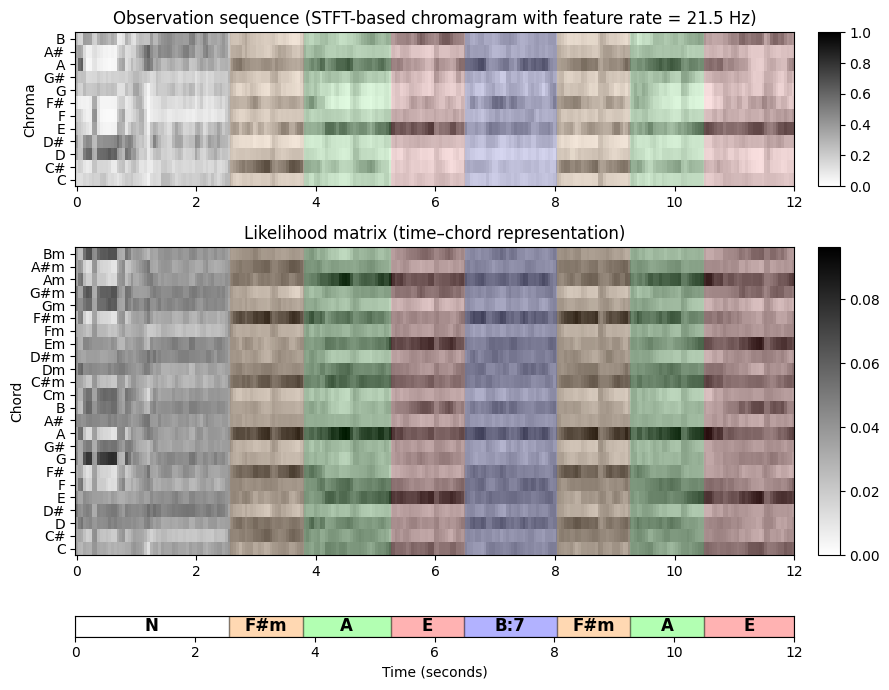

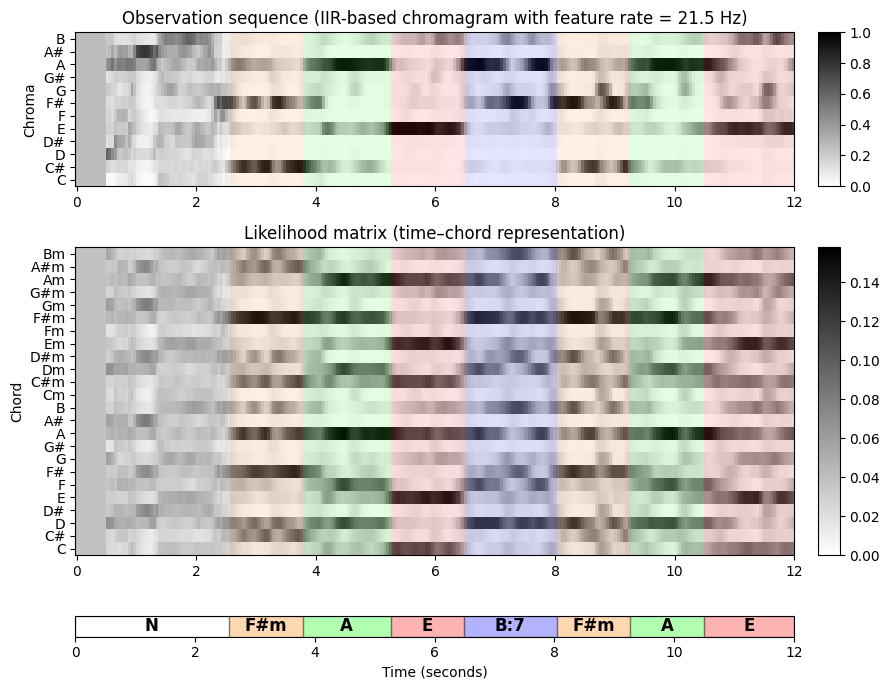

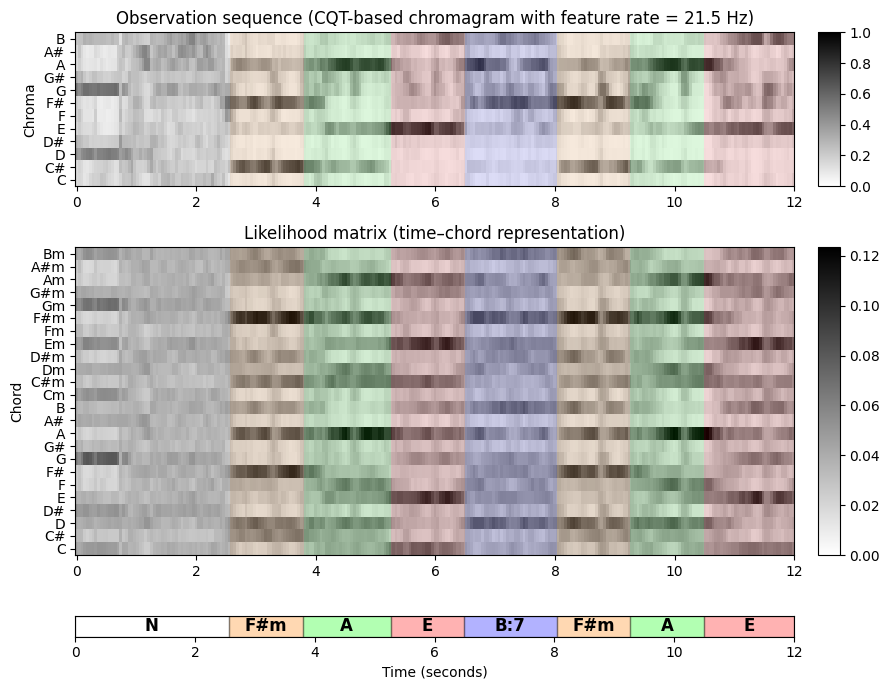

In [3]:
fn_wav = '../Data/Oasis - Wonderwall.wav'
fn_ann = '../Data/wonderwal_labels.csv'
color_ann = {'N': [1, 1, 1, 1], 'F#m': [1, 0.5, 0, 1], 'A': [0, 1, 0, 1], 
             'E': [1, 0, 0, 1], 'B:7': [0, 0, 1, 1]}

plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_STFT)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_IIR)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_CQT)

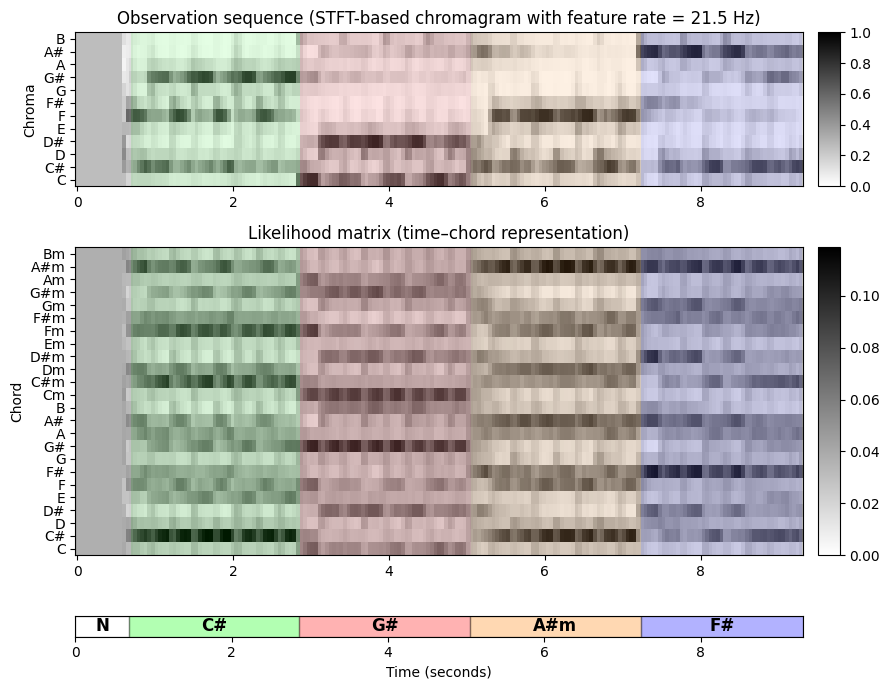

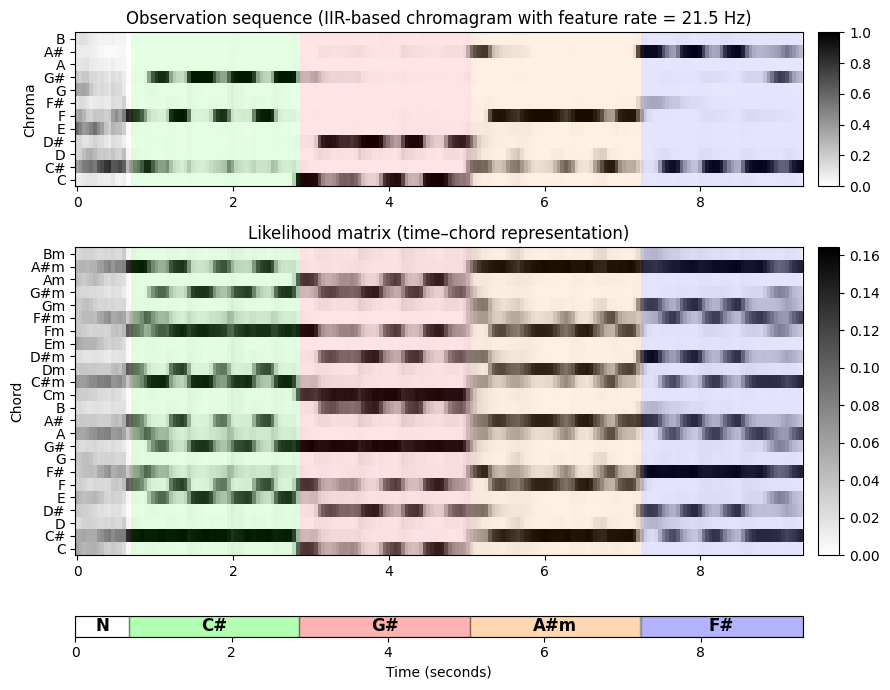

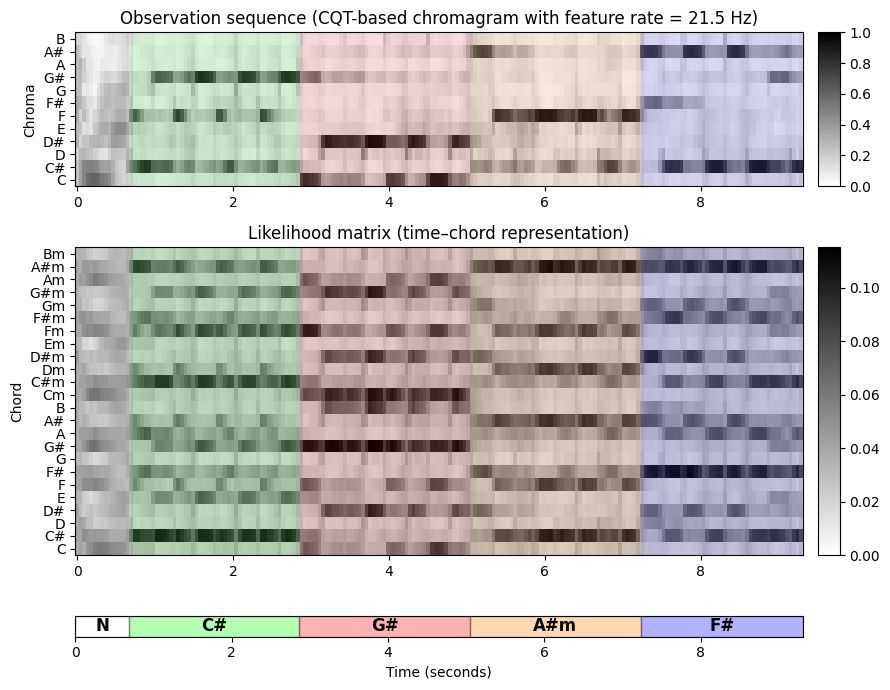

In [4]:
fn_wav = '../Data/Lewis Capaldi - Someone You Loved.wav'
fn_ann = '../Data/someone_you_loved_labels.csv'
color_ann = {'N': [1, 1, 1, 1], 'A#m': [1, 0.5, 0, 1], 'C#': [0, 1, 0, 1], 
             'G#': [1, 0, 0, 1], 'F#': [0, 0, 1, 1]}

plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_STFT)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_IIR)
plot_hmm_likelihood_matrix(fn_wav, fn_ann, color_ann, CHORD_LABELS, version=V_CQT)

In [4]:
color_ann = {'N': 'white', 
             'C#': 'peru', 'E': 'springgreen', 'F#': 'coral', 
             'G#': 'olive', 'A': 'teal', 'B:7': 'pink',
             'F#m': 'steelblue', 'A#m': 'steelblue'}

song_dict = {}
song_dict[0] = ['Wonderwall', 'r', 
                '../Data/Oasis - Wonderwall.wav',
                '../Data/wonderwal_labels.csv']
song_dict[1] = ['SomeoneYouLoved', 'b',
                '../Data/Lewis Capaldi - Someone You Loved.wav',
                '../Data/someone_you_loved_labels.csv']

song_selected = [0, 1]

print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')



===== Computation of STFT-based chromagrams =====
Processing:  Wonderwall
Processing:  SomeoneYouLoved
===== Computation of CQT-based chromagrams =====
Processing:  Wonderwall
Processing:  SomeoneYouLoved
===== Computation of IIR-based chromagrams =====
Processing:  Wonderwall
Processing:  SomeoneYouLoved


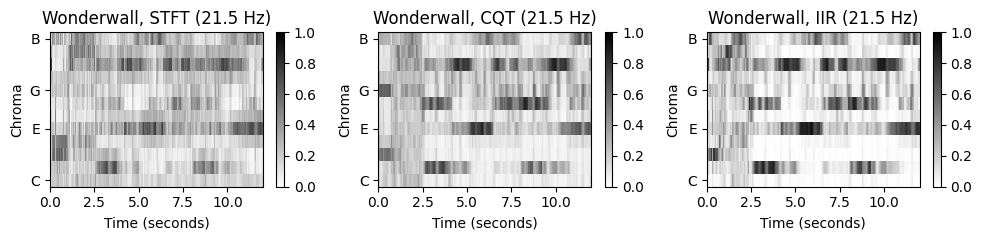

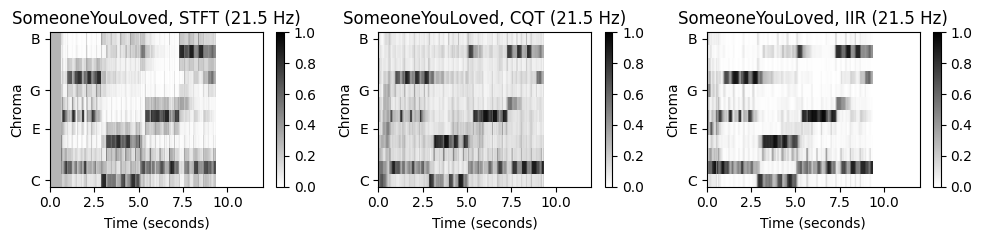

In [6]:
cmap = 'gray_r'
for s in song_selected:
    fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1], 
                                              'height_ratios': [2]}, figsize=(10, 2.5))
    title = '%s, STFT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_STFT[s])
    libfmp.b.plot_chromagram(X_dict_STFT[s], Fs=Fs_X_dict_CQT[s], ax=[ax[0]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])
    
    title = '%s, CQT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_CQT[s])
    libfmp.b.plot_chromagram(X_dict_CQT[s], Fs=Fs_X_dict_CQT[s], ax=[ax[1]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])  

    title = '%s, IIR (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_IIR[s])
    libfmp.b.plot_chromagram(X_dict_IIR[s], Fs=Fs_X_dict_IIR[s], ax=[ax[2]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 12])      
    plt.tight_layout()

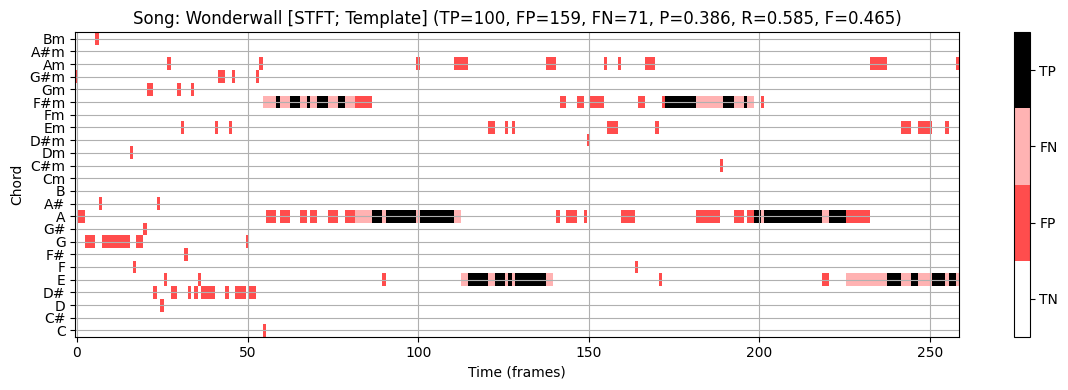

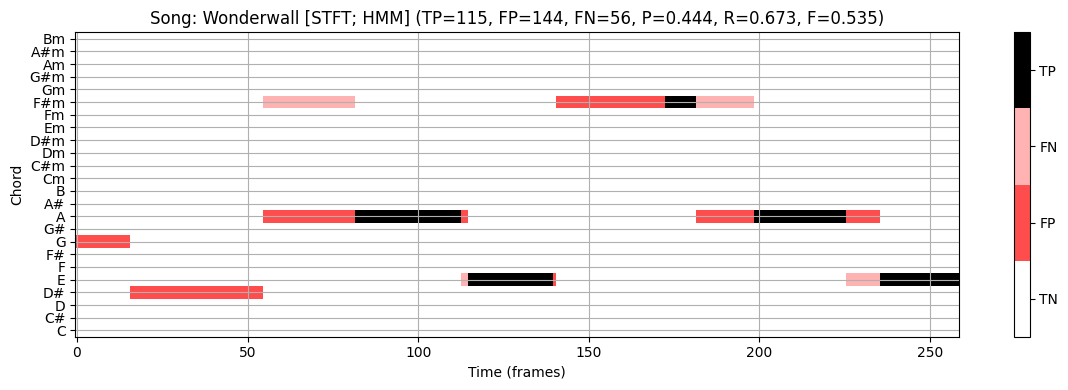

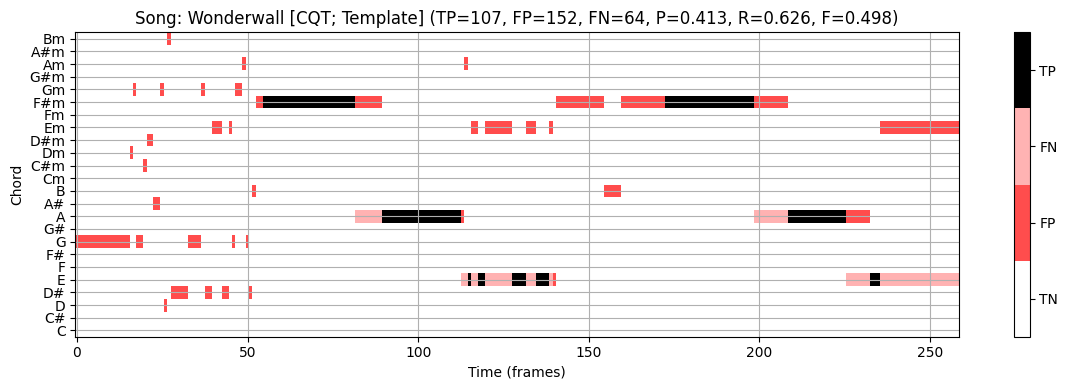

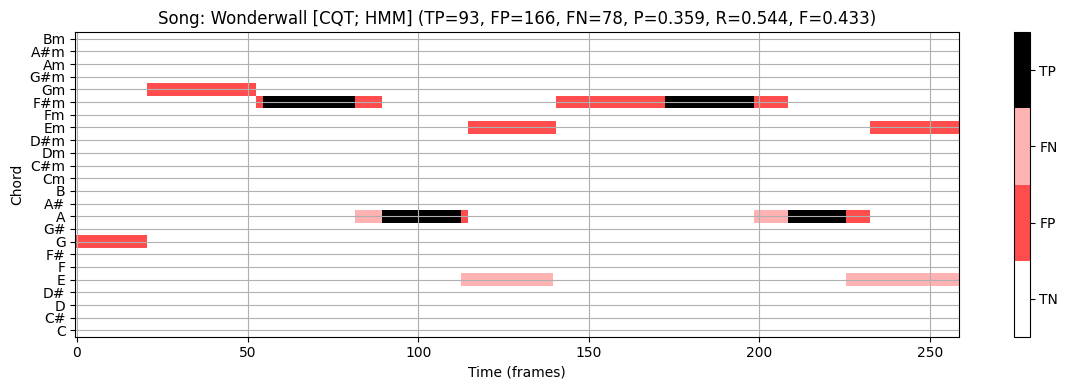

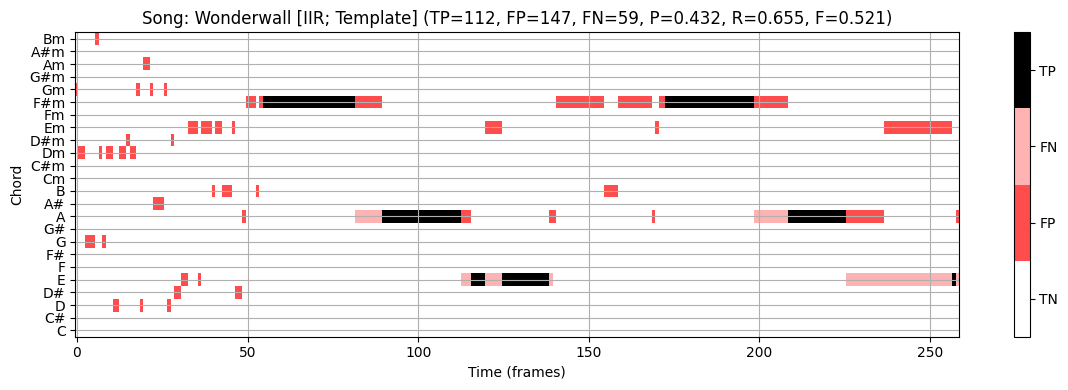

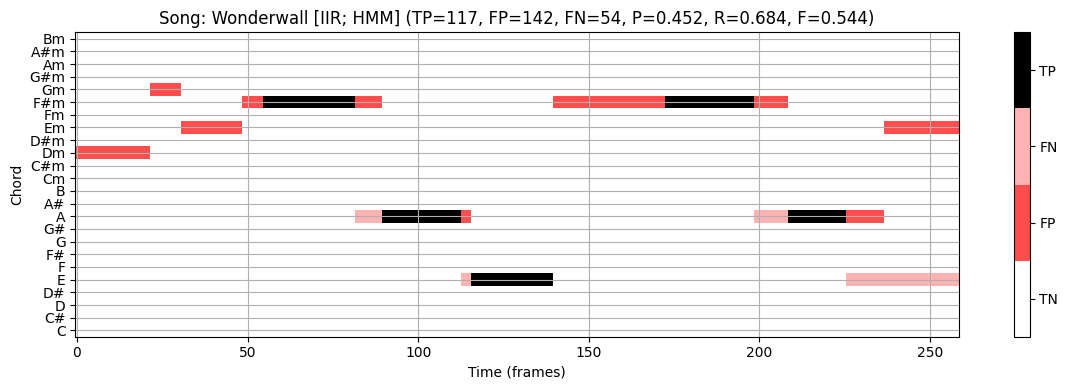

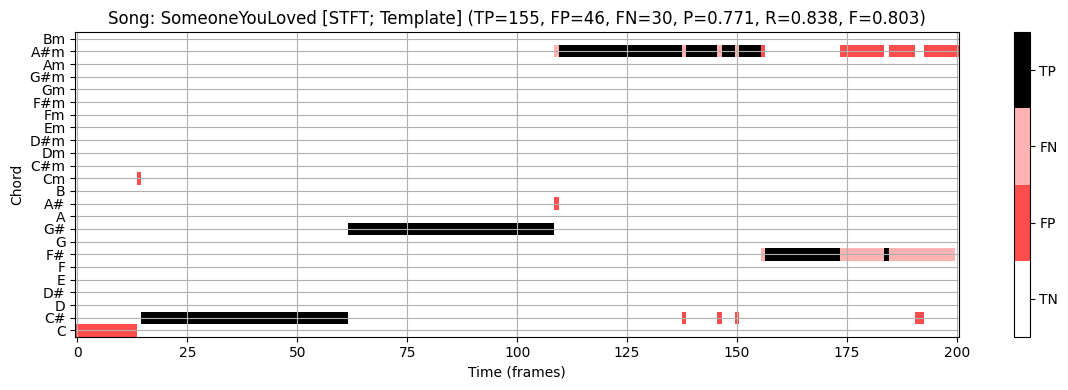

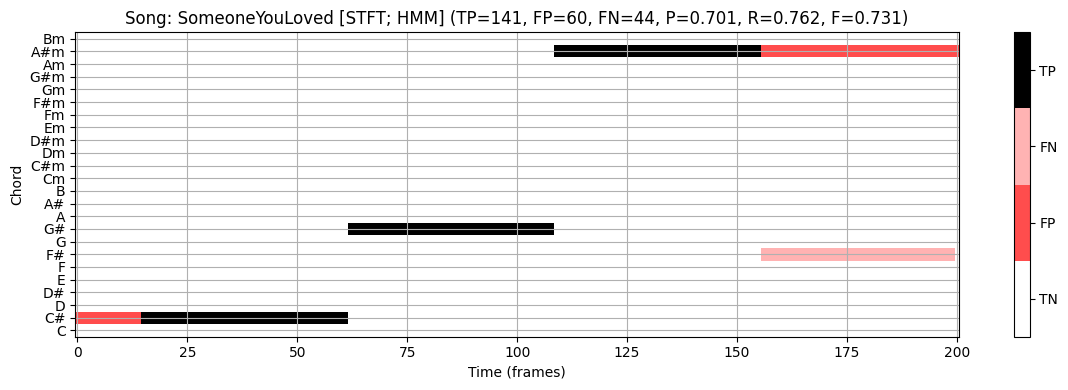

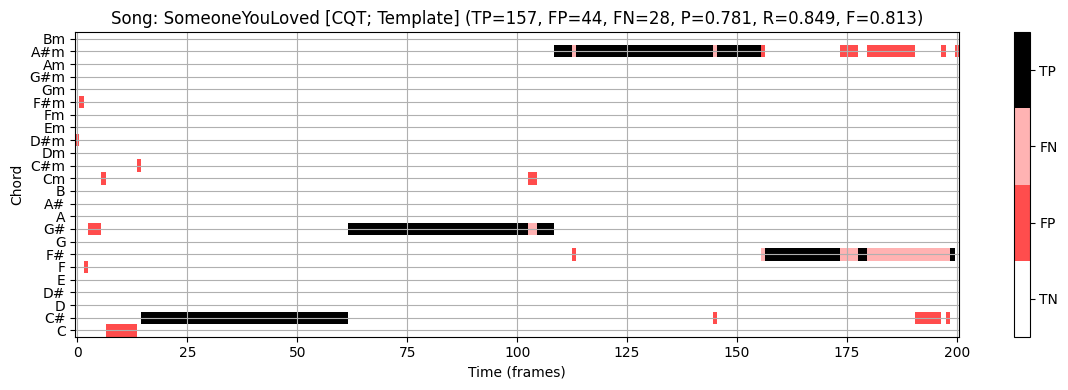

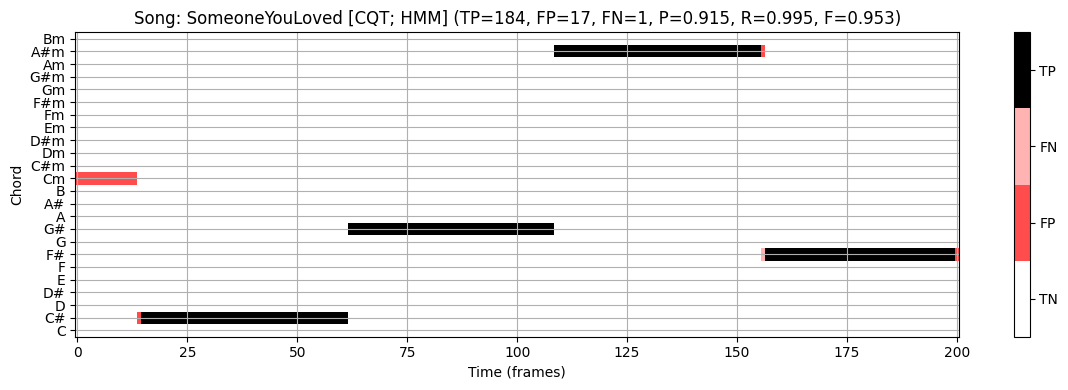

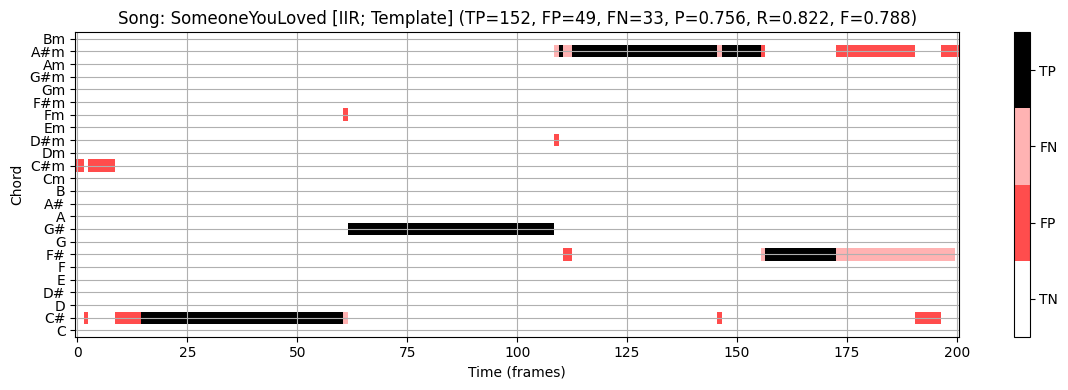

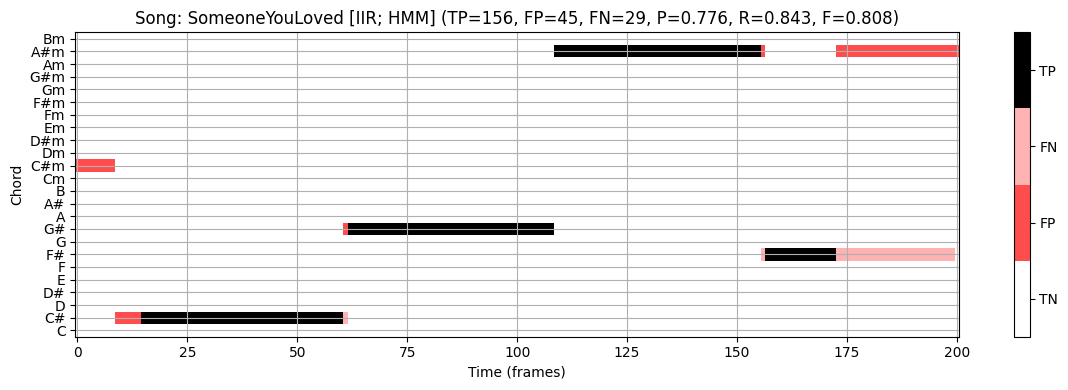

In [8]:
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  

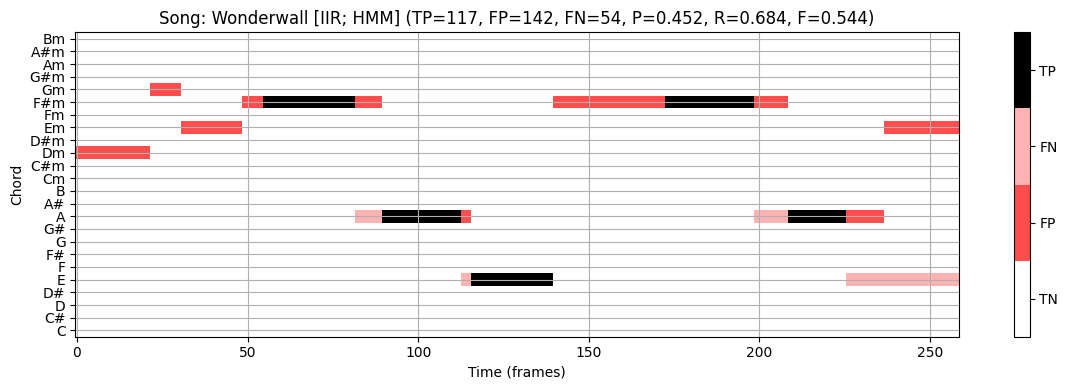

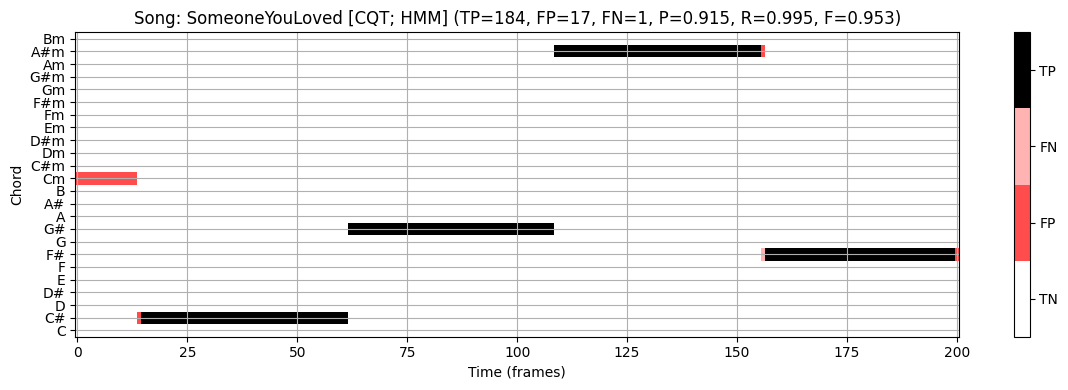

In [12]:
# Best results for each song
output = chord_recognition_all(X_dict_IIR[0], ann_dict_IIR[0][0], p=0.15)
result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
title = 'Song: %s [IIR; HMM]' % song_dict[0][0]
plot_chord_recognition_result(ann_dict_IIR[0][0], result_HMM, chord_HMM, chord_labels, title=title) 

output = chord_recognition_all(X_dict_CQT[1], ann_dict_CQT[1][0], p=0.15)
result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
title = 'Song: %s [CQT; HMM]' % song_dict[1][0]
plot_chord_recognition_result(ann_dict_CQT[1][0], result_HMM, chord_HMM, chord_labels, title=title) 

===== Prefiltering experiment using STFT-based chromagrams =====
Processing: Wonderwall
Processing: SomeoneYouLoved
===== Prefiltering experiment using CQT-based chromagrams =====
Processing: Wonderwall
Processing: SomeoneYouLoved
===== Prefiltering experiment using IIR-based chromagrams =====
Processing: Wonderwall
Processing: SomeoneYouLoved


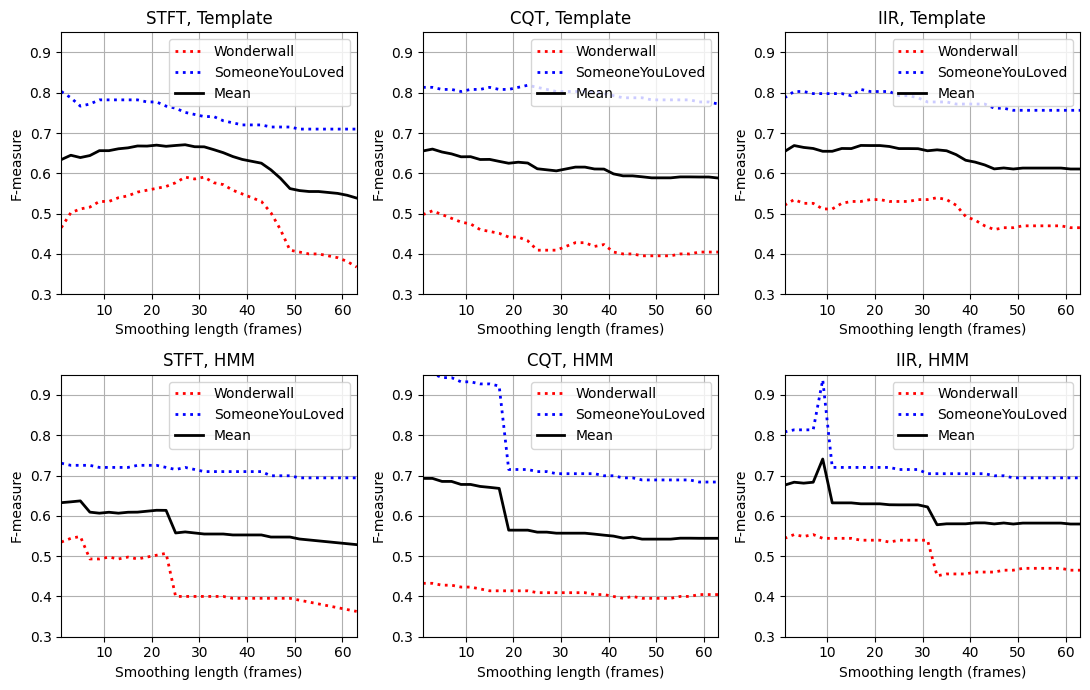

In [13]:
song_selected = [0, 1]
para_list = np.arange(32) * 2 + 1    
print('===== Prefiltering experiment using STFT-based chromagrams =====')
result_STFT = experiment_chord_recognition(song_selected, song_dict, X_dict_STFT, 
                                           ann_dict_STFT, para_list, para_type='smooth', 
                                           p=0.15, filt_len=None, filt_type='mean')
print('===== Prefiltering experiment using CQT-based chromagrams =====')
result_CQT  = experiment_chord_recognition(song_selected, song_dict, X_dict_CQT, 
                                           ann_dict_CQT, para_list, para_type='smooth', 
                                           p=0.15, filt_len=None, filt_type='mean')
print('===== Prefiltering experiment using IIR-based chromagrams =====')
result_IIR  = experiment_chord_recognition(song_selected, song_dict, X_dict_IIR, 
                                           ann_dict_IIR, para_list, para_type='smooth', 
                                           p=0.15, filt_len=None, filt_type='mean')

# Plot result
fig, ax = plt.subplots(2, 3, figsize=(11, 7))
#fig, ax = plt.subplots(2, 3, figsize=(9.5, 6))
xlabel='Smoothing length (frames)'
ylim = [0.3, 0.95]
title='STFT, Template'
plot_statistics(para_list, song_dict, song_selected, result_STFT[0], ax[0, 0], 
                ylim=ylim, title=title, xlabel=xlabel)
title='STFT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_STFT[1], ax[1, 0], 
                ylim=ylim, title=title, xlabel=xlabel)
title='CQT, Template'                           
plot_statistics(para_list, song_dict, song_selected, result_CQT[0], ax[0, 1], 
                ylim=ylim, title=title, xlabel=xlabel)
title='CQT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_CQT[1], ax[1, 1], 
                ylim=ylim, title=title, xlabel=xlabel)
title='IIR, Template'                           
plot_statistics(para_list, song_dict, song_selected, result_IIR[0], ax[0, 2], 
                ylim=ylim, title=title, xlabel=xlabel)
title='IIR, HMM'
plot_statistics(para_list, song_dict, song_selected, result_IIR[1], ax[1, 2], 
                ylim=ylim, title=title, xlabel=xlabel)
plt.tight_layout()  

===== Self-transition probability experiment using STFT-based chromagrams =====
Processing: Wonderwall
Processing: SomeoneYouLoved
===== Self-transition probability experiment using CQT-based chromagrams =====
Processing: Wonderwall
Processing: SomeoneYouLoved
===== Self-transition probability experiment using IIR-based chromagrams =====
Processing: Wonderwall
Processing: SomeoneYouLoved


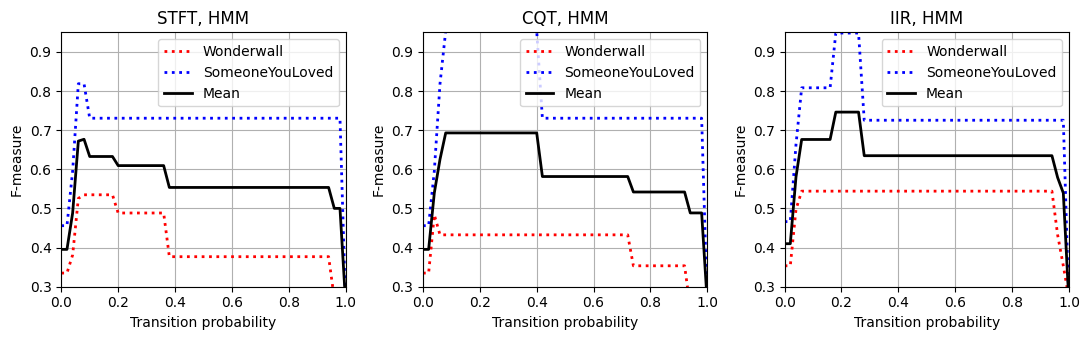

In [14]:
song_selected = [0, 1]
para_list = (np.arange(51)) * 0.02
print('===== Self-transition probability experiment using STFT-based chromagrams =====')
result_STFT = experiment_chord_recognition(song_selected, song_dict, X_dict_STFT, ann_dict_STFT, 
                                           para_list, para_type='p', p=0.15, filt_len=None)
print('===== Self-transition probability experiment using CQT-based chromagrams =====')
result_CQT  = experiment_chord_recognition(song_selected, song_dict, X_dict_CQT, ann_dict_CQT, 
                                           para_list, para_type='p', p=0.15, filt_len=None)
print('===== Self-transition probability experiment using IIR-based chromagrams =====')
result_IIR  = experiment_chord_recognition(song_selected, song_dict, X_dict_IIR, ann_dict_IIR, 
                                           para_list, para_type='p', p=0.15, filt_len=None)

# Plot result
fig, ax = plt.subplots(1,3, figsize=(11, 3.5))
xlabel='Transition probability'
ylim = [0.3, 0.95]
title='STFT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_STFT[1], ax[0], ylim=ylim, title=title, xlabel=xlabel)
title='CQT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_CQT[1], ax[1], ylim=ylim, title=title, xlabel=xlabel)
title='IIR, HMM'
plot_statistics(para_list, song_dict, song_selected, result_IIR[1], ax[2], ylim=ylim, title=title, xlabel=xlabel)
plt.tight_layout() 